In [1]:
#ds3
import pandas as pd

# Create a new dataset
data = {
    'Age': [25, 35, 45, 30, 40, 50, 28, 38, 48],
    'Income': [50000, 60000, 70000, 55000, 65000, 75000, 52000, 62000, 72000],
    'Age_Group': ['20s', '30s', '40s', '30s', '40s', '50s', '20s', '30s', '40s']
}

df = pd.DataFrame(data)

# Calculate summary statistics grouped by 'Age_Group' for 'Income'
summary_stats = df.groupby('Age_Group')['Income'].agg(['mean', 'median', 'min', 'max', 'std'])

# Print the summary statistics
print(summary_stats)

# Create a list containing a numeric value for each response to the categorical variable
categorical_values = df['Age_Group'].unique().tolist()
print("Categorical Values:", categorical_values)


              mean   median    min    max          std
Age_Group                                             
20s        51000.0  51000.0  50000  52000  1414.213562
30s        59000.0  60000.0  55000  62000  3605.551275
40s        69000.0  70000.0  65000  72000  3605.551275
50s        75000.0  75000.0  75000  75000          NaN
Categorical Values: ['20s', '30s', '40s', '50s']


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#ds4
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [8]:
boston=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\train.csv")

In [9]:
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [10]:
boston.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

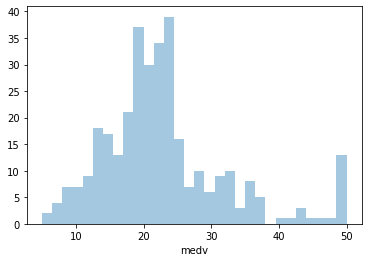

In [15]:
sns.distplot(boston['medv'], bins=30,kde=0)
plt.show()

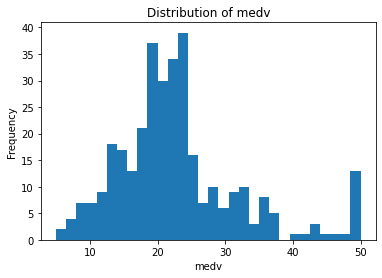

In [14]:
import matplotlib.pyplot as plt
plt.hist(boston['medv'], bins=30)
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.title('Distribution of medv')
plt.show()


<AxesSubplot:>

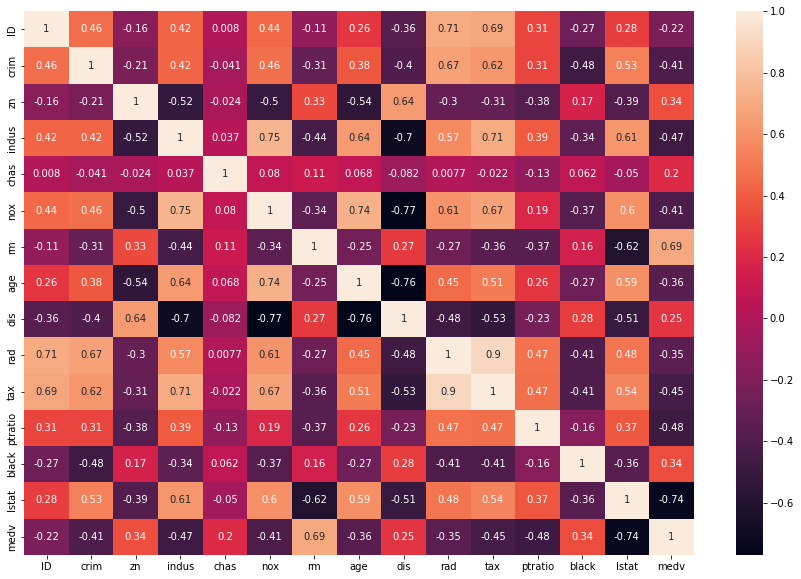

In [27]:
plt.figure(figsize=(15,10))
correlation_matrix = boston.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'MEDV')

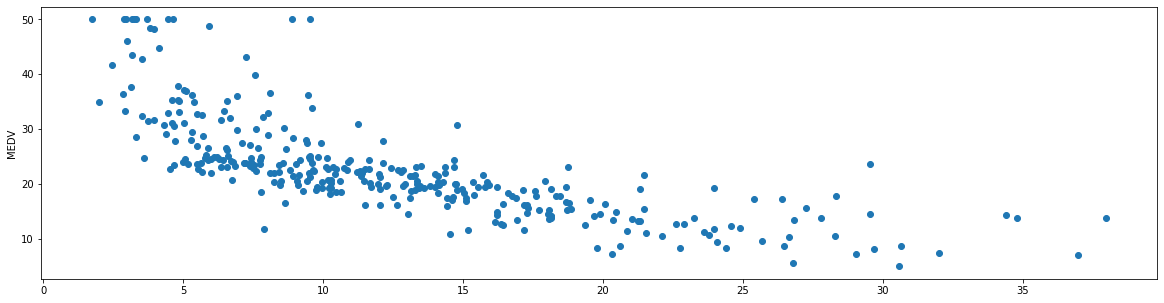

In [30]:
plt.figure(figsize=(20, 5))
plt.scatter(boston['lstat'], boston['medv'])
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

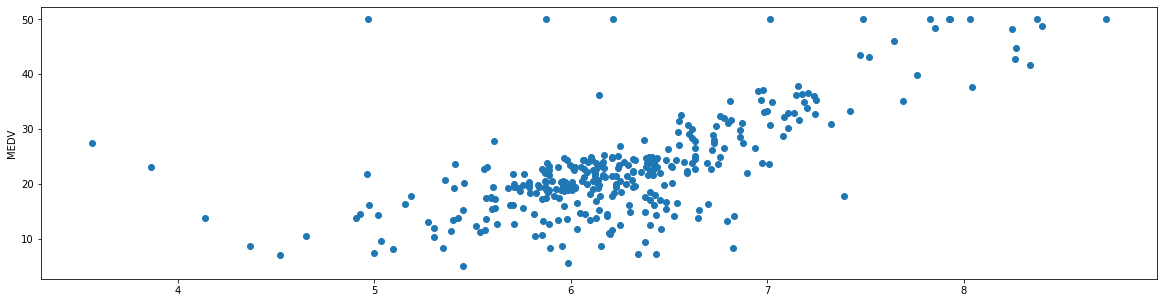

In [31]:
plt.figure(figsize=(20, 5))
plt.scatter(boston['rm'], boston['medv'])
plt.ylabel('MEDV')

In [38]:
x= boston[['lstat', 'rm']]
y = boston['medv']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

(266, 2)
(67, 2)
(266,)
(67,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [45]:

y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 5.21502368354922
R2 score is 0.6407306934066376


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [55]:
#ds5
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Social-Network-ads-Boost-master\Social-Network-ads-Boost-master\Social_Network_Ads.csv")
#dataset.head()

In [52]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [68]:

# Encode the "Gender" variable to numeric values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Split the data into features (X) and target variable (y)
x = df[[ 'Age', 'EstimatedSalary']]
y= df['Purchased']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [70]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [71]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [73]:
print(y_pred[:20])
print(y_test[:20].to_list())

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [77]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [81]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
# Extract TP, FP, TN, FN from the confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate error rate
error_rate = round(1 - accuracy,1)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Print the computed values
print("Confusion Matrix:\n", cm)
print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
 [[65  3]
 [ 8 24]]
True Positives: 24
False Positives: 3
True Negatives: 65
False Negatives: 8
Accuracy: 0.89
Error Rate: 0.1
Precision: 0.8888888888888888
Recall: 0.75


In [82]:
#ds6
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Iris.csv")

In [83]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [94]:
y_pred = classifier.predict(X_test) 

In [100]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate error rate
error_rate = 1 - accuracy

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Print the computed values
print("Confusion Matrix:\n", cm)
print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
 [[12  0  0]
 [ 0  9  1]
 [ 0  1  7]]
True Positives: 12
False Positives: 0
True Negatives: 9
False Negatives: 0
Accuracy: 0.9333333333333333
Error Rate: 0.06666666666666665
Precision: 0.9333333333333333
Recall: 0.9333333333333333


In [102]:
# Tokenization using NLTK
from nltk import word_tokenize, sent_tokenize
sent = "GeeksforGeeks is a great learning platform.\
It is one of the best for Computer Science students."
print(word_tokenize(sent))
print(sent_tokenize(sent))


['GeeksforGeeks', 'is', 'a', 'great', 'learning', 'platform.It', 'is', 'one', 'of', 'the', 'best', 'for', 'Computer', 'Science', 'students', '.']
['GeeksforGeeks is a great learning platform.It is one of the best for Computer Science students.']


In [104]:

from nltk.stem import PorterStemmer
# create an object of class PorterStemmer
porter = PorterStemmer()
print(porter.stem("Communication"))

commun


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag

# Sample document
document = "Tokenization is the process of breaking down text into words, phrases, symbols, or other meaningful elements called tokens."

# Tokenization
tokens = word_tokenize(document)

# POS tagging
pos_tags = pos_tag(tokens)

# Stop words removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Print the results
print("Original Document:\n", document)
print("\nTokenization:\n", tokens)
print("\nPOS Tagging:\n", pos_tags)
print("\nStop Words Removal:\n", filtered_tokens)
print("\nStemming:\n", stemmed_tokens)
print("\nLemmatization:\n", lemmatized_tokens)


In [107]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
tokens

['Tokenization',
 'is',
 'the',
 'process',
 'of',
 'breaking',
 'down',
 'text',
 'into',
 'words',
 ',',
 'phrases',
 ',',
 'symbols',
 ',',
 'or',
 'other',
 'meaningful',
 'elements',
 'called',
 'tokens',
 '.']

In [108]:
# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(tokens)


In [109]:

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
breaking : 3.4423470353692043
called : 3.4423470353692043
down : 3.4423470353692043
elements : 3.4423470353692043
into : 3.4423470353692043
is : 3.4423470353692043
meaningful : 3.4423470353692043
of : 3.4423470353692043
or : 3.4423470353692043
other : 3.4423470353692043
phrases : 3.4423470353692043
process : 3.4423470353692043
symbols : 3.4423470353692043
text : 3.4423470353692043
the : 3.4423470353692043
tokenization : 3.4423470353692043
tokens : 3.4423470353692043
words : 3.4423470353692043


In [111]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)




Word indexes:
{'tokenization': 15, 'is': 5, 'the': 14, 'process': 11, 'of': 7, 'breaking': 0, 'down': 2, 'text': 13, 'into': 4, 'words': 17, 'phrases': 10, 'symbols': 12, 'or': 8, 'other': 9, 'meaningful': 6, 'elements': 3, 'called': 1, 'tokens': 16}

tf-idf value:
  (0, 15)	1.0
  (1, 5)	1.0
  (2, 14)	1.0
  (3, 11)	1.0
  (4, 7)	1.0
  (5, 0)	1.0
  (6, 2)	1.0
  (7, 13)	1.0
  (8, 4)	1.0
  (9, 17)	1.0
  (11, 10)	1.0
  (13, 12)	1.0
  (15, 8)	1.0
  (16, 9)	1.0
  (17, 6)	1.0
  (18, 3)	1.0
  (19, 1)	1.0
  (20, 16)	1.0


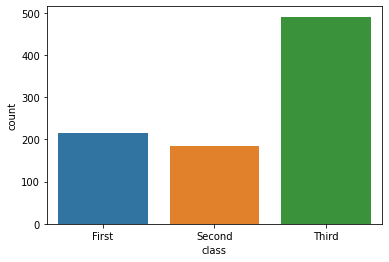

In [113]:
#ds8
import seaborn as sns

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Explore the dataset using various visualizations
# For example, you can create a count plot of the number of passengers in each class
sns.countplot(x='class', data=titanic)

# Show the plots
plt.show()

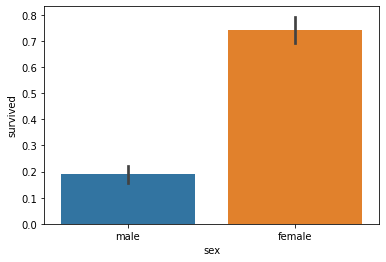

In [114]:
# You can also create a bar plot of the survival rate by gender
sns.barplot(x='sex', y='survived', data=titanic)

# Show the plots
plt.show()

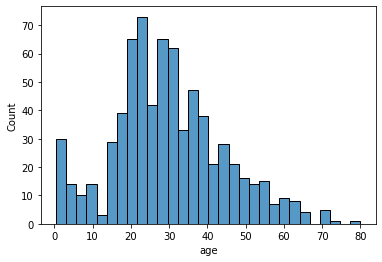

In [115]:
# Additionally, you can create a histogram of the passengers' ages
sns.histplot(data=titanic, x='age', bins=30)

# Show the plots
plt.show()

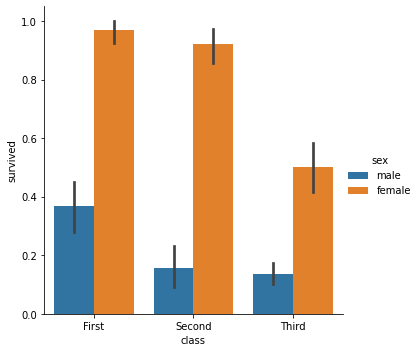

In [116]:
# To see the survival rate based on both class and gender, you can use a categorical plot
sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=titanic)

# Show the plots
plt.show()

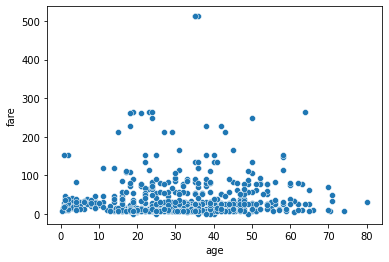

In [117]:
# Finally, you can create a scatter plot of fare versus age
sns.scatterplot(x='age', y='fare', data=titanic)

# Show the plots
plt.show()


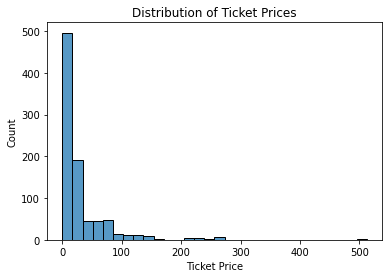

In [119]:
 #Plot a histogram of the ticket prices (fare)
sns.histplot(data=titanic, x='fare', bins=30)

# Add labels and title
plt.xlabel('Ticket Price')
plt.ylabel('Count')
plt.title('Distribution of Ticket Prices')

# Show the plot
plt.show()

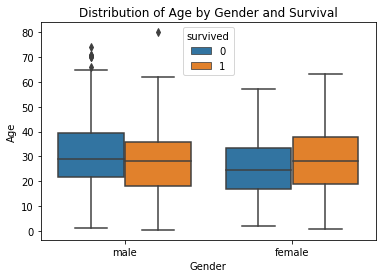

In [120]:
# Plot a box plot of age with respect to gender and survival status
sns.boxplot(x='sex', y='age', hue='survived', data=titanic)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender and Survival')

# Show the plot
plt.show()

In [121]:
#ds9
import pandas as pd

# Load the Iris dataset
iris_data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Iris.csv")

# Display the features and their types
feature_types = iris_data.dtypes
print(feature_types)


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


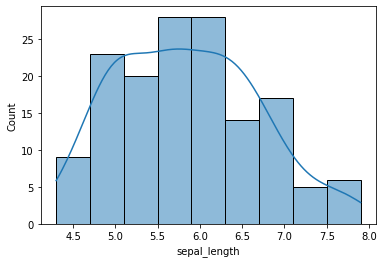

In [123]:
import seaborn as sns

# Load the Iris dataset
iris_data = sns.load_dataset('iris')

# Create histograms for each feature
sns.histplot(data=iris_data, x='sepal_length', kde=True)


# Show the histograms
plt.show()


[]

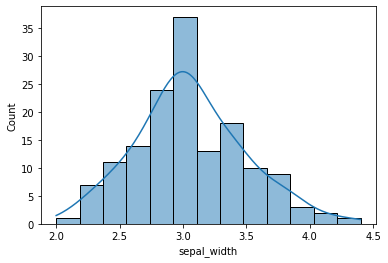

In [124]:
sns.histplot(data=iris_data, x='sepal_width', kde=True)
plt.plot()

[]

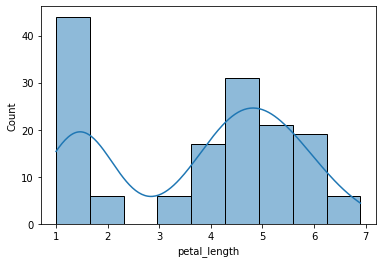

In [125]:

sns.histplot(data=iris_data, x='petal_length', kde=True)
plt.plot()

[]

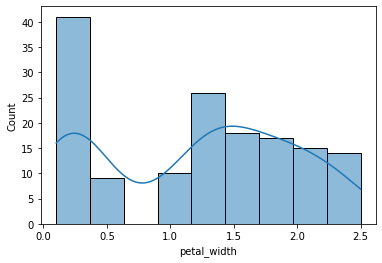

In [126]:
#sns.histplot(data=iris_data, x='petal_length', kde=True)
sns.histplot(data=iris_data, x='petal_width', kde=True)
plt.plot()

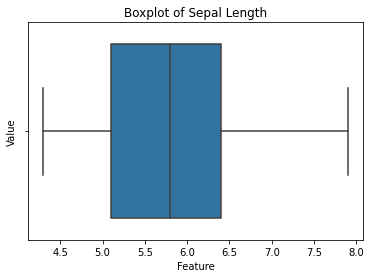

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_data = sns.load_dataset('iris')

# Create boxplots for each feature
sns.boxplot(data=iris_data, x='sepal_length')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Boxplot of Sepal Length')
plt.show()


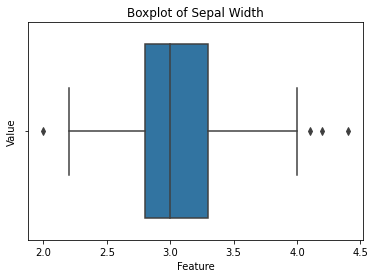

In [129]:

sns.boxplot(data=iris_data, x='sepal_width')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Boxplot of Sepal Width')

plt.show()

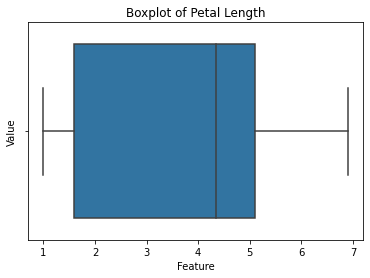

In [130]:
sns.boxplot(data=iris_data, x='petal_length')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Boxplot of Petal Length')
plt.show()

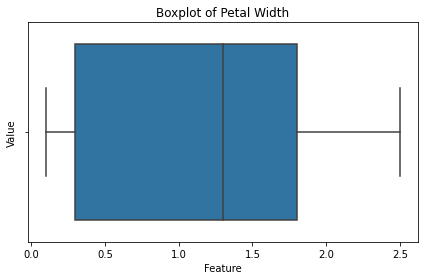

In [131]:

sns.boxplot(data=iris_data, x='petal_width')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Boxplot of Petal Width')

# Adjust the layout of subplots
plt.tight_layout()

# Show the boxplots
plt.show()

In [132]:
# Identify outliers
outliers = []
for feature in iris_data.columns[:-1]:
    q1 = iris_data[feature].quantile(0.25)
    q3 = iris_data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    feature_outliers = iris_data[(iris_data[feature] < lower_bound) | (iris_data[feature] > upper_bound)]
    outliers.extend(feature_outliers.index)

outliers = list(set(outliers))
print("Outliers:")
print(iris_data.loc[outliers])

# Show the boxplots
plt.show()

Outliers:
    sepal_length  sepal_width  petal_length  petal_width     species
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor
15           5.7          4.4           1.5          0.4      setosa


In [133]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
